### Model
##### Link
> https://github.com/OlafenwaMoses/ImageAI/releases
>
> https://github.com/OlafenwaMoses/ImageAI/releases/tag/1.0
>
> https://github.com/OlafenwaMoses/ImageAI/blob/master/imageai/Prediction/README.md
>
> https://github.com/OlafenwaMoses/ImageAI/blob/master/imageai/Detection/README.md
>
> https://blog.csdn.net/zkt286468541/article/details/81007022

##### Readme
    SqueezeNet（预测速度最快 正确率中等）
    ResNet50 （预测速度快 正确率较高）
    InceptionV3（预测速度慢 正确率高）
    DenseNet121（预测速度更慢 正确率最高）


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from imageai.Prediction import ImagePrediction
from imageai.Detection import ObjectDetection

# [root@41408bc1e5aa /]# yum install libSM libXrender
# [root@41408bc1e5aa /]# /root/anaconda3/bin/pip install -U keras==2.2.0

from IPython.display import Image

Using TensorFlow backend.


In [3]:
import tensorflow as tf
import keras
tf.__version__, keras.__version__

('1.4.0', '2.2.0')

In [4]:
prediction = ImagePrediction()
prediction.setModelTypeAsResNet()
prediction.setModelPath("model/resnet50_weights_tf_dim_ordering_tf_kernels.h5")
prediction.loadModel()


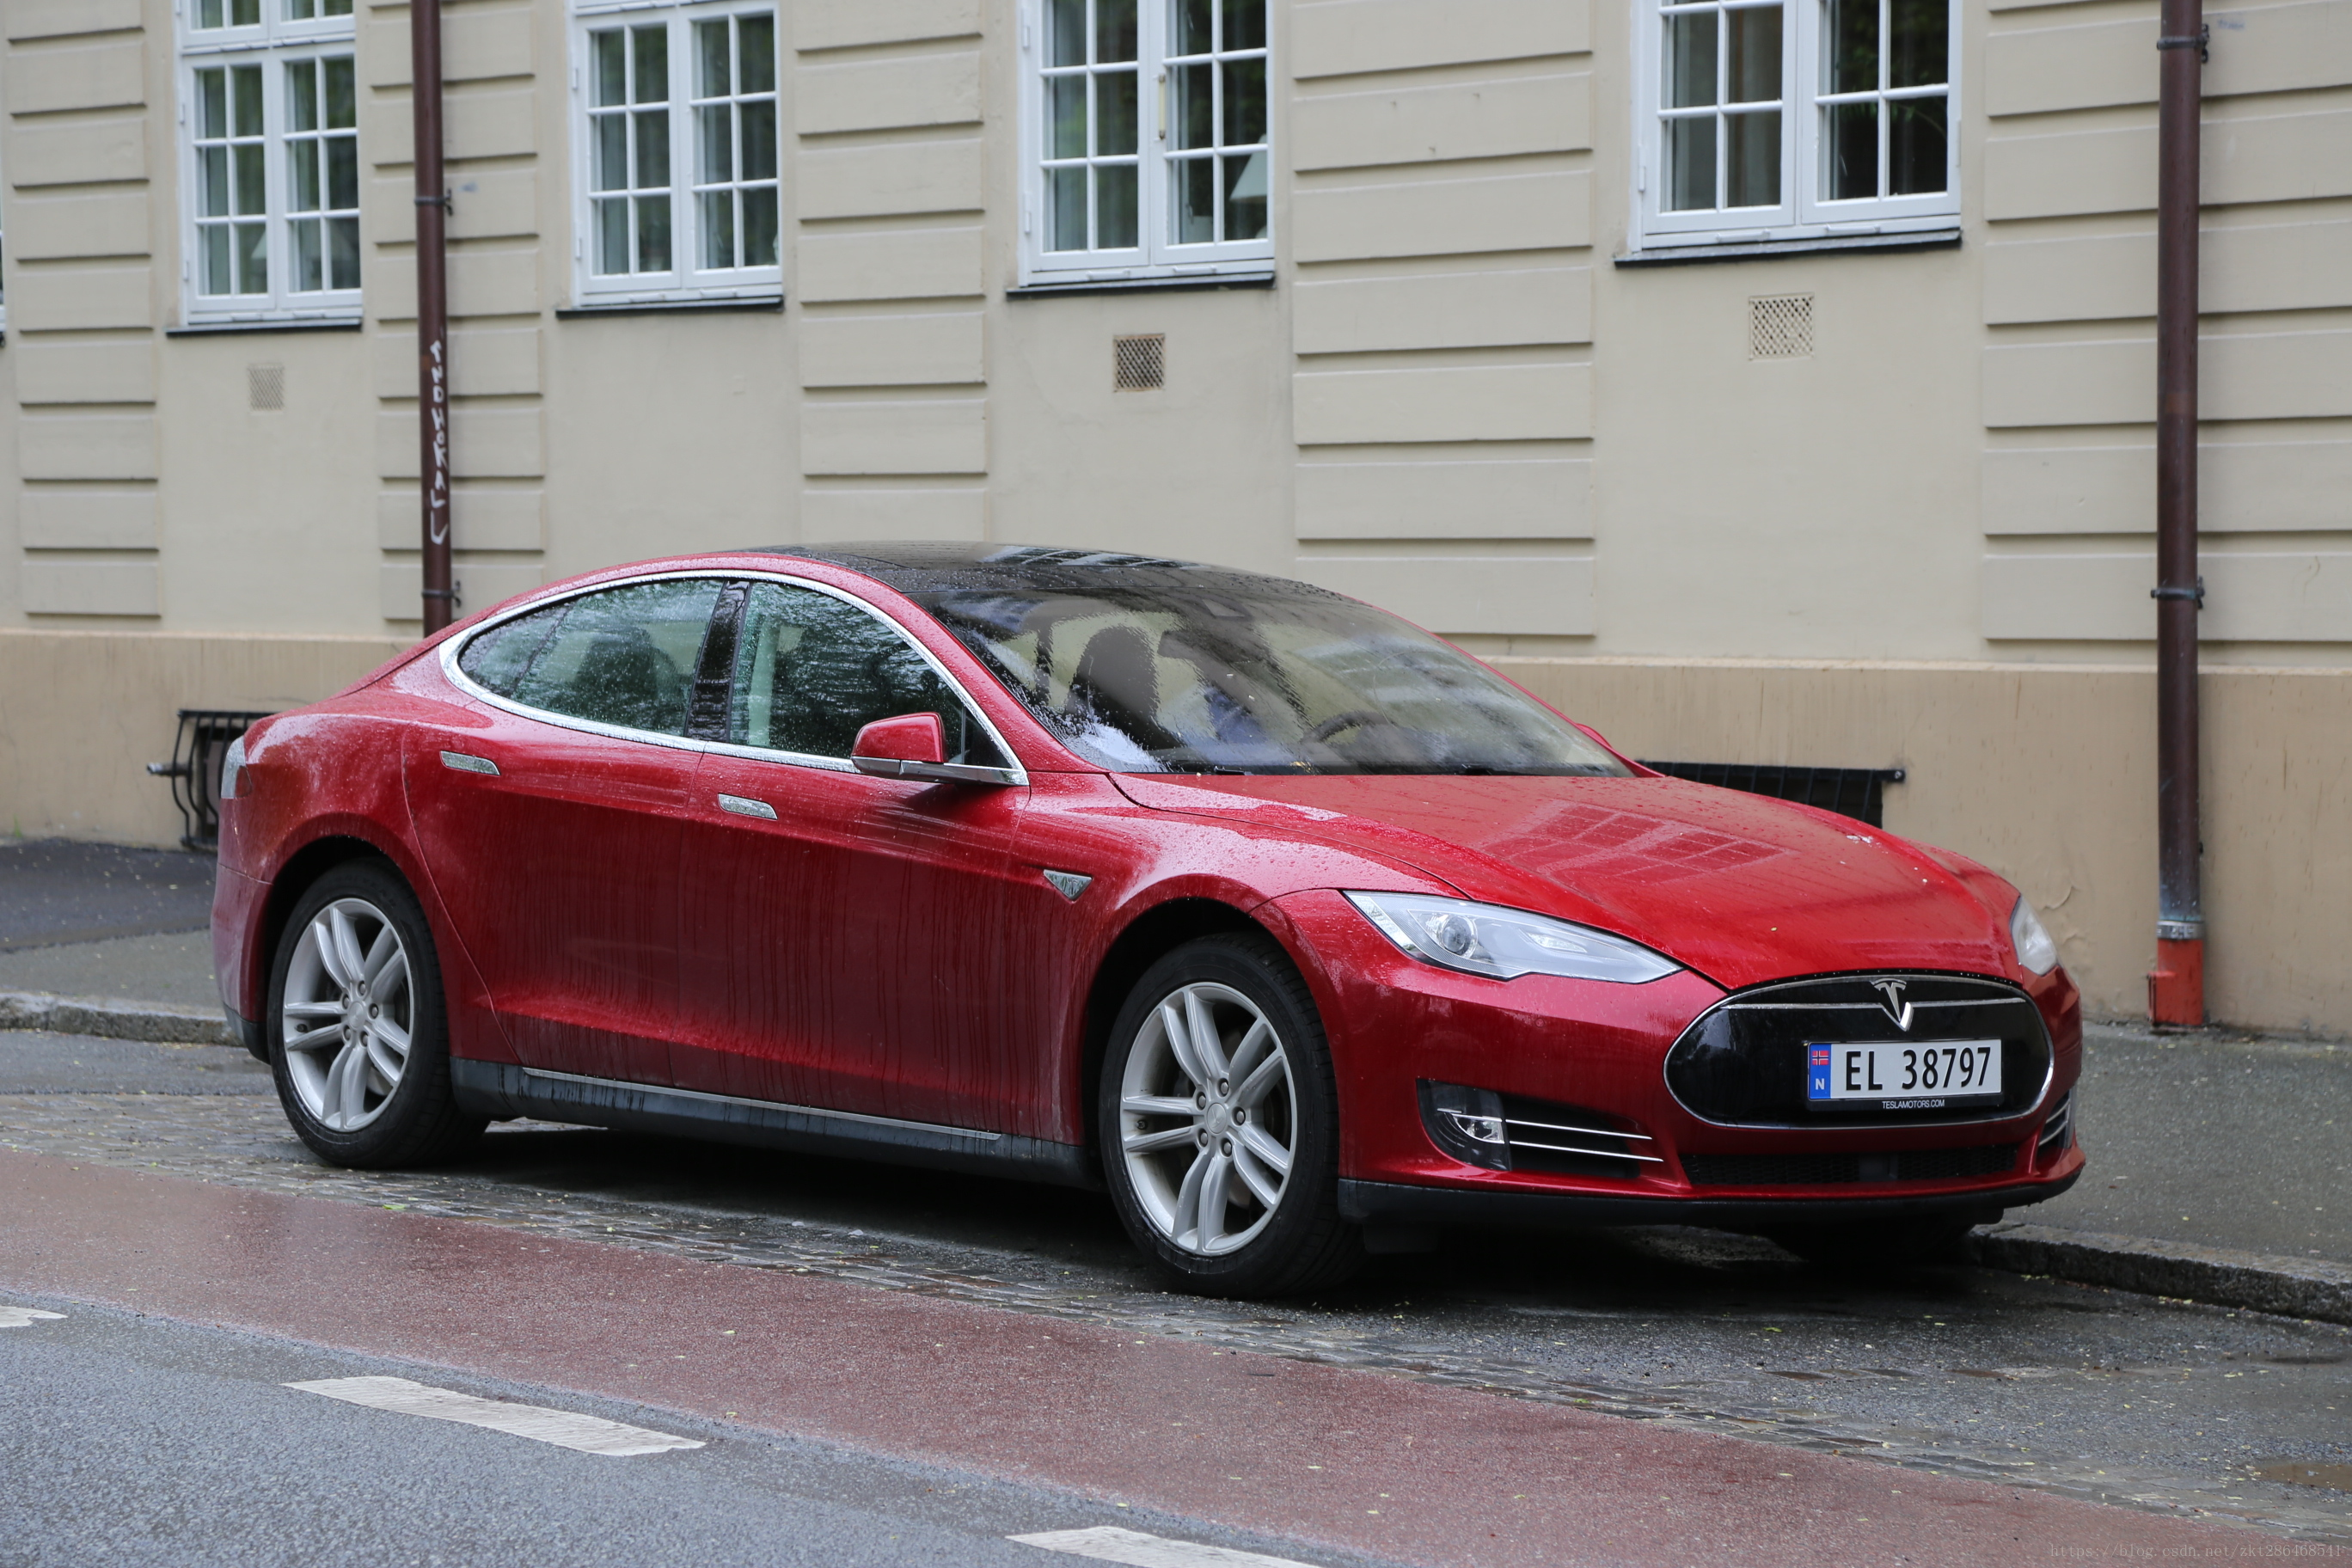

In [5]:
Image(filename="img001.jpg", width=300, height=300)

In [6]:
%time predictions, probabilities = prediction.predictImage("img001.jpg", result_count=5)
for i, j in zip(predictions, probabilities):
    print(f"{i}:{j}")


CPU times: user 853 ms, sys: 41.9 ms, total: 895 ms
Wall time: 692 ms
convertible:52.96057462692261
sports_car:37.57430016994476
pickup:3.0779220163822174
car_wheel:1.746683195233345
minivan:1.5850178897380829


In [7]:
detector = ObjectDetection()
detector.setModelTypeAsTinyYOLOv3()
detector.setModelPath("model/yolo-tiny.h5")
detector.loadModel()


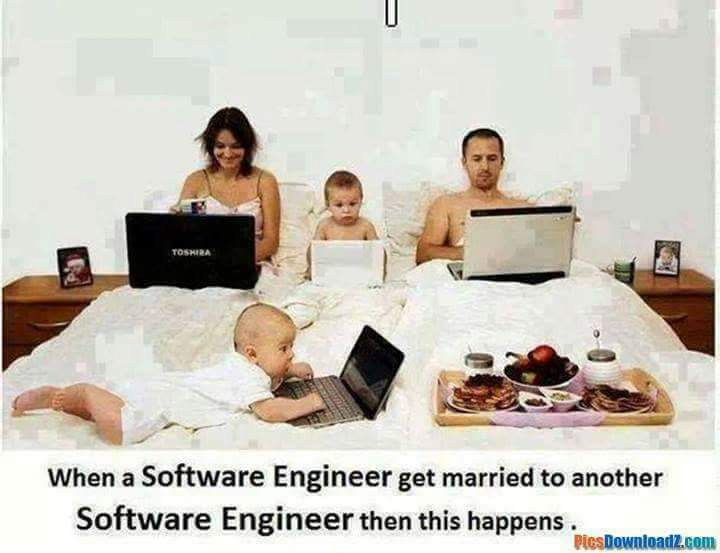

In [8]:
Image(filename="img002.jpg", width=300, height=300)

In [9]:
%time detections = detector.detectObjectsFromImage(input_image="img002.jpg",output_image_path="img002_n.jpg",minimum_percentage_probability=30)

for eachObject in detections:
    print(eachObject["name"], " : ", eachObject["percentage_probability"], " : ", eachObject["box_points"])
    print("--------------------------------")


CPU times: user 3.36 s, sys: 341 ms, total: 3.7 s
Wall time: 2.56 s
laptop  :  30.240598320961  :  [305, 241, 387, 283]
--------------------------------
donut  :  54.28295135498047  :  [15, 379, 130, 438]
--------------------------------
person  :  58.40638279914856  :  [170, 104, 285, 296]
--------------------------------
person  :  62.51209378242493  :  [412, 120, 567, 282]
--------------------------------
person  :  84.35085415840149  :  [307, 169, 384, 256]
--------------------------------


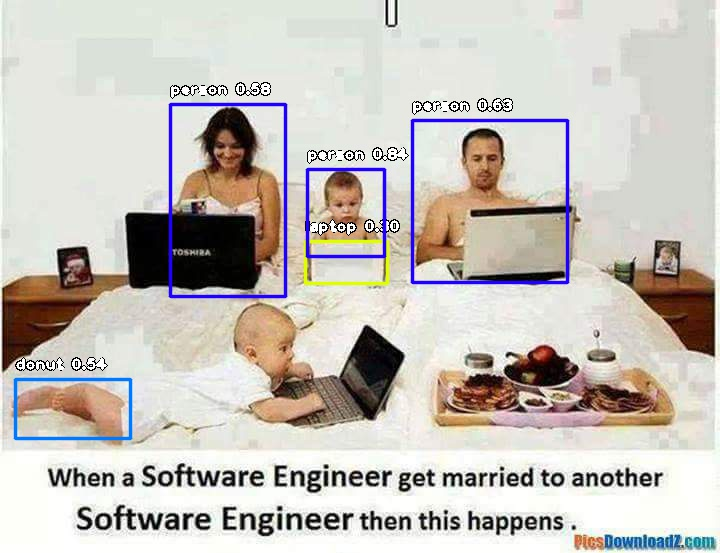

In [10]:
Image(filename="img002_n.jpg", width=300, height=300)

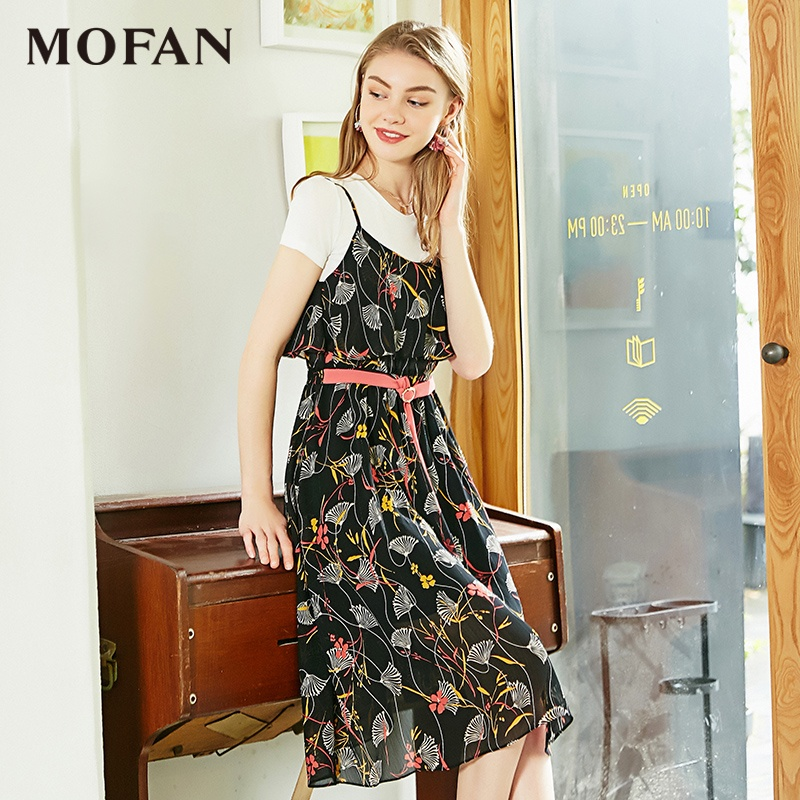

In [11]:
Image(filename="img003.jpg", width=300, height=300)

In [12]:
%time detections = detector.detectObjectsFromImage(input_image="img003.jpg",output_image_path="img003_n.jpg",minimum_percentage_probability=30)

for eachObject in detections:
    print(eachObject["name"], " : ", eachObject["percentage_probability"], " : ", eachObject["box_points"])
    print("--------------------------------")

CPU times: user 2.34 s, sys: 290 ms, total: 2.63 s
Wall time: 1.5 s


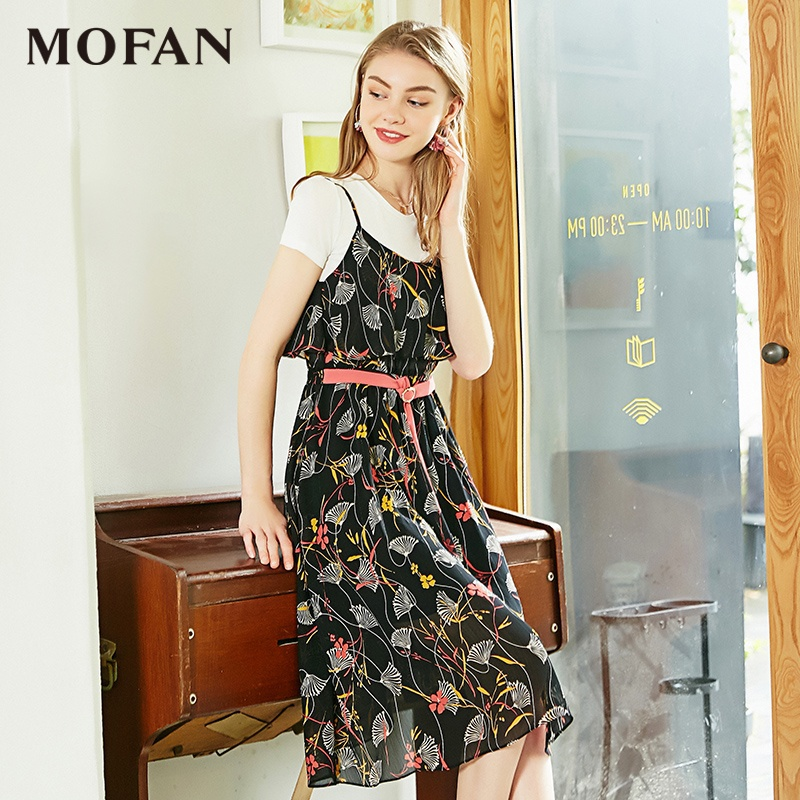

In [13]:
Image(filename="img003_n.jpg", width=300, height=300)